# MBA FIAP Inteligência Artificial & Machine Learning
## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Integrante 1             | RM 12345      | `1IA` |
| Integrante 2             | RM 12345      | `1IA` |
| Integrante 3             | RM 12345      | `1IA` |
| Integrante 4             | RM 12345      | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos e, até mesmo, trechos de código-fonte.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e teste do Modelo__
5. __Validação do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [176]:
#IMPLEMENTAR

auto_df = pd.read_csv("data/automobile-mod.csv", sep=";")
auto_df.head(10)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

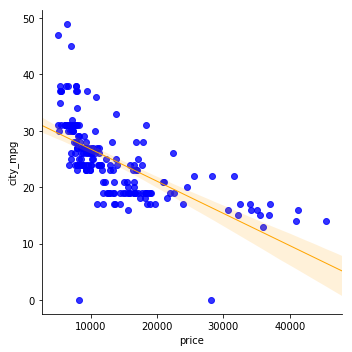

In [177]:
#IMPLEMENTAR
sns.lmplot("price", "city_mpg", auto_df,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

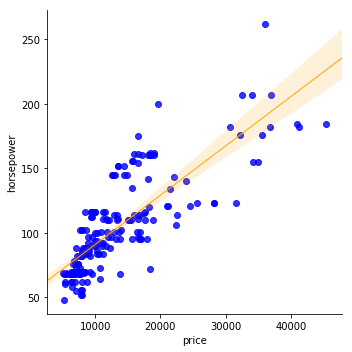

In [178]:
sns.lmplot("price", "horsepower", auto_df,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

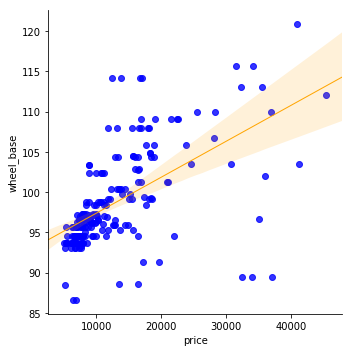

In [179]:
sns.lmplot("price", "wheel_base", auto_df,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

**Pergunta**: Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta**:

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

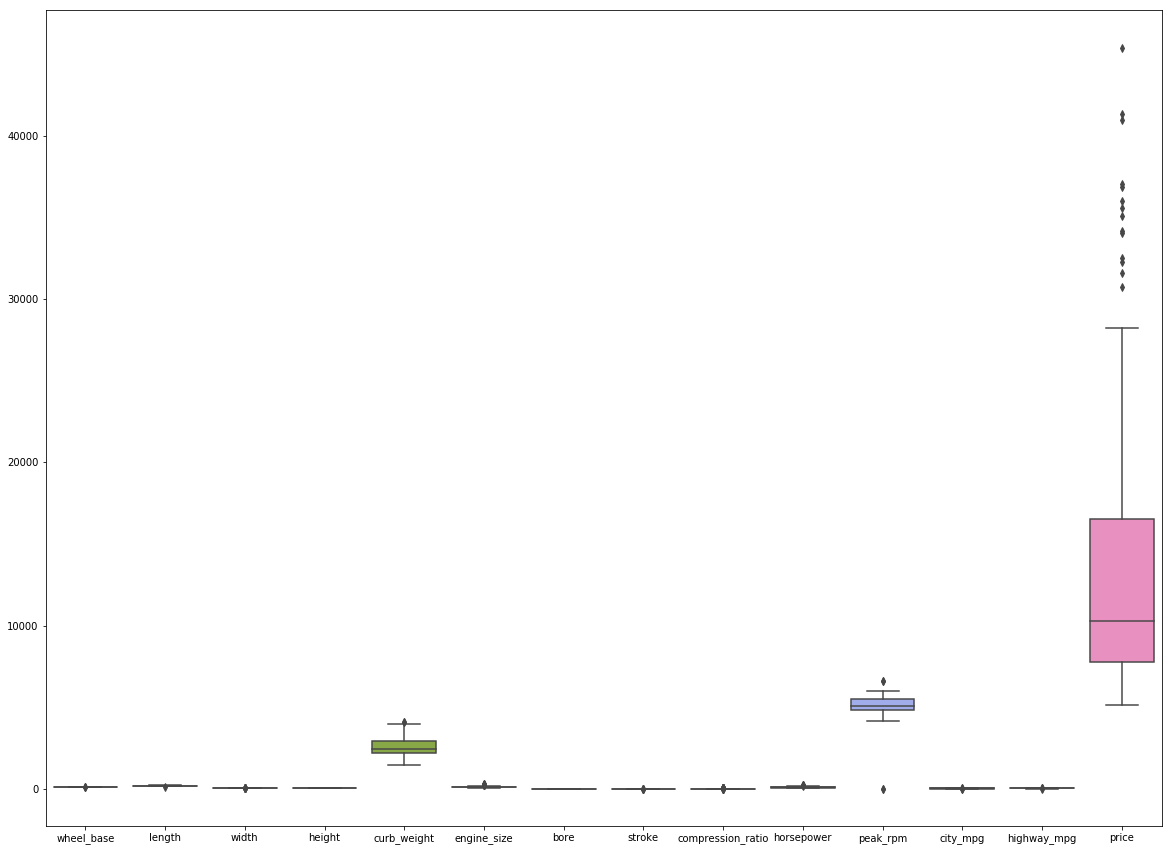

In [180]:
#IMPLEMENTAÇÃO

fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.boxplot(ax=ax, data=auto_df)

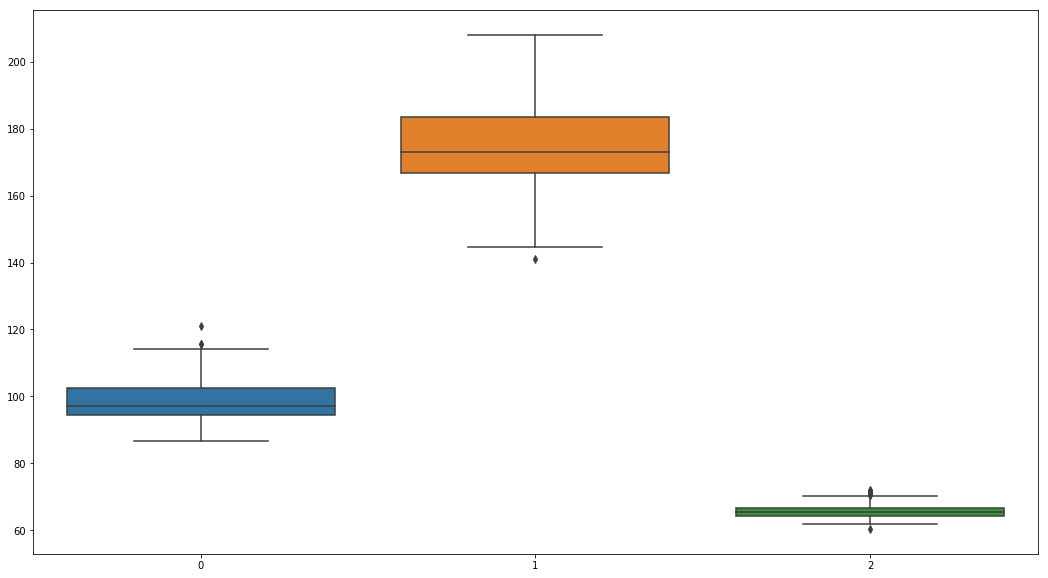

In [181]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.boxplot(ax=ax, data=[auto_df["wheel_base"],auto_df["length"],auto_df["width"]])

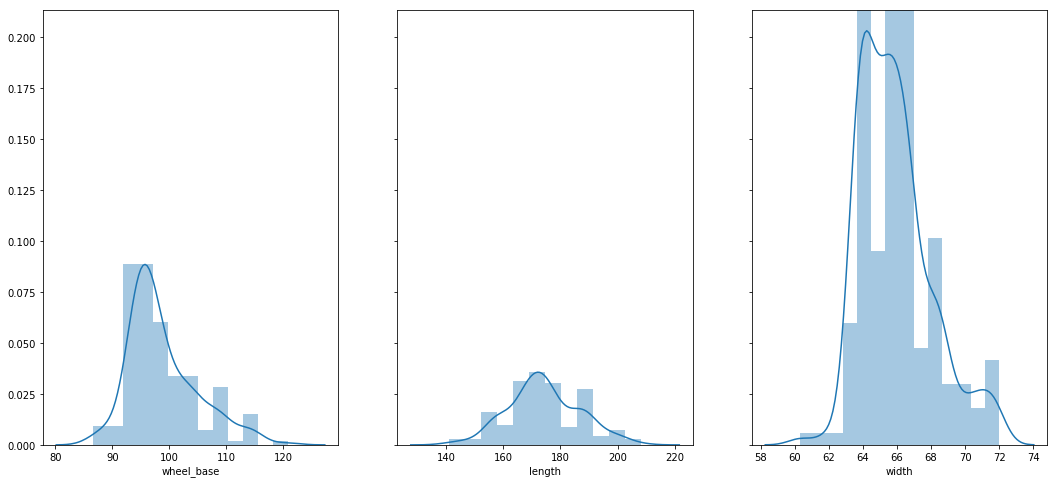

In [182]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_size_inches(18, 8)
sns.distplot(auto_df["wheel_base"],ax=ax1)
sns.distplot(auto_df["length"],ax=ax2)
sns.distplot(auto_df["width"],ax=ax3)

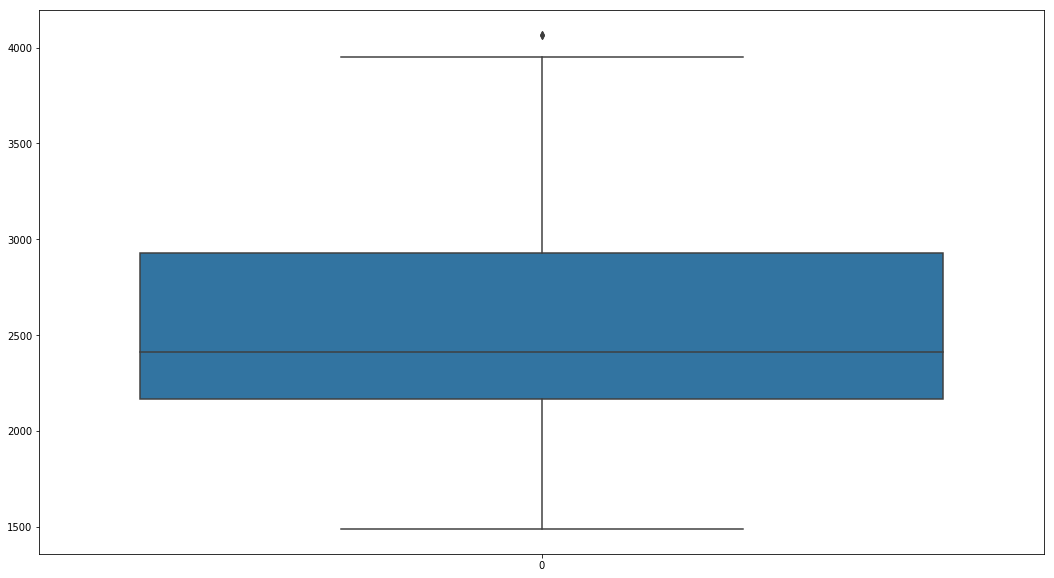

In [183]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.boxplot(ax=ax, data=[auto_df["curb_weight"]])

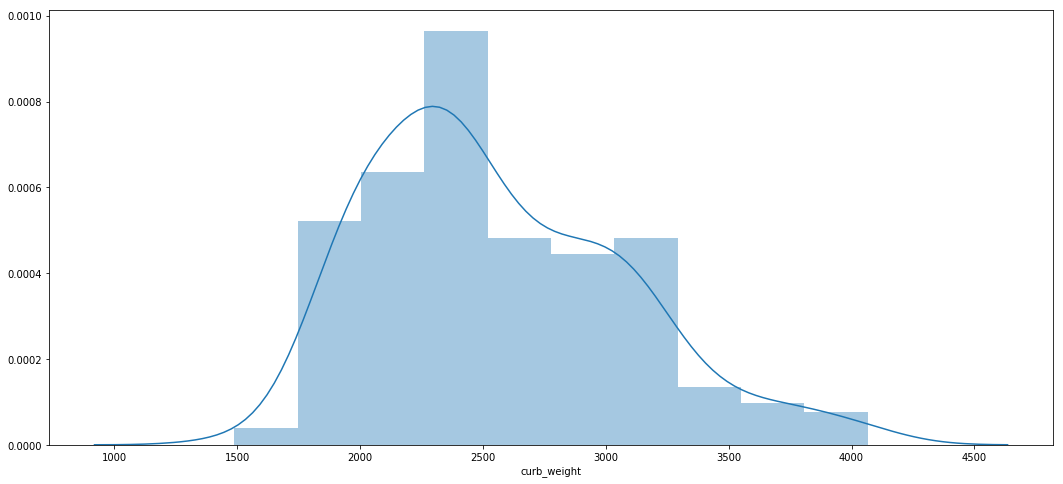

In [184]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(18, 8)
sns.distplot(auto_df["curb_weight"], ax=ax1)

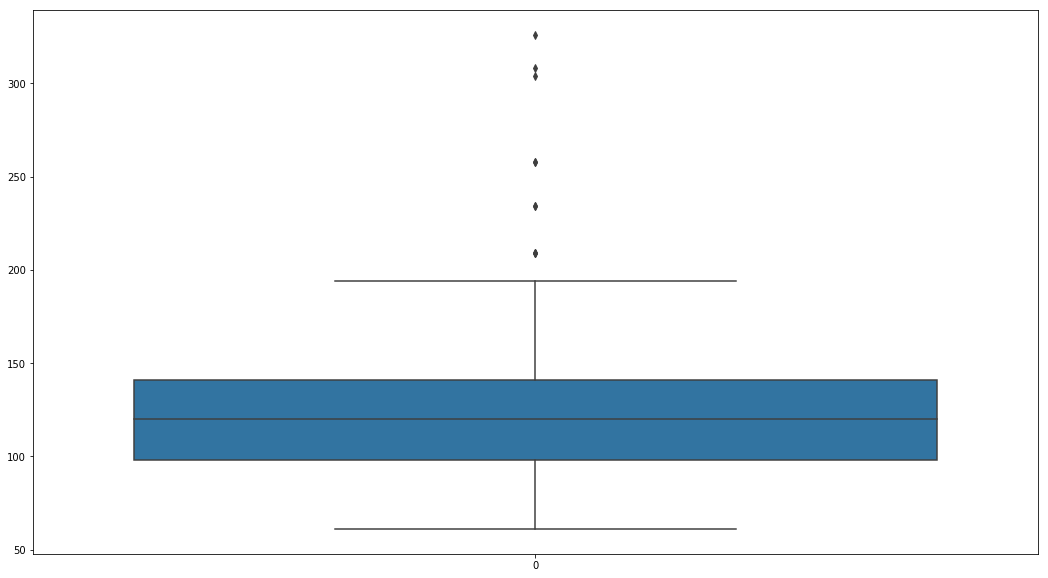

In [185]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.boxplot(ax=ax, data=[auto_df["engine_size"]])

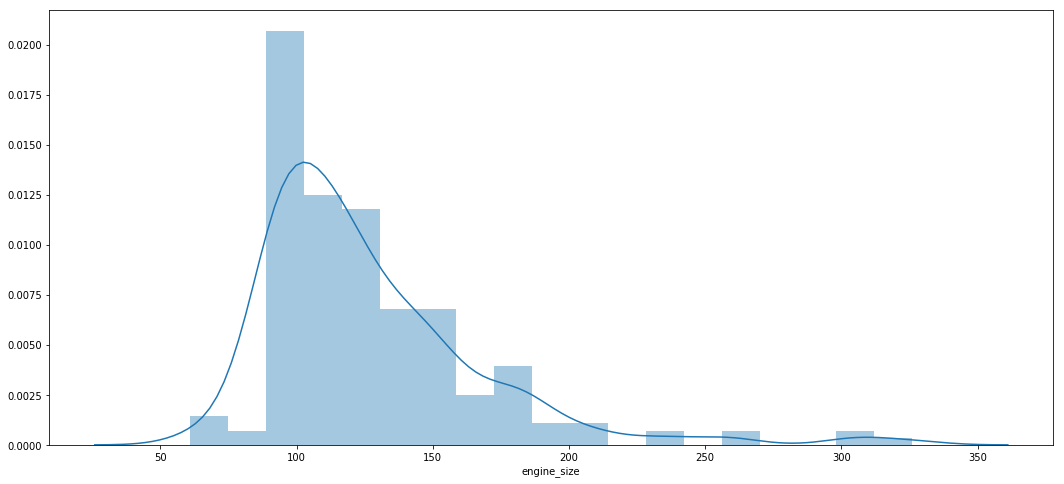

In [186]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(18, 8)
sns.distplot(auto_df["engine_size"], ax=ax1)

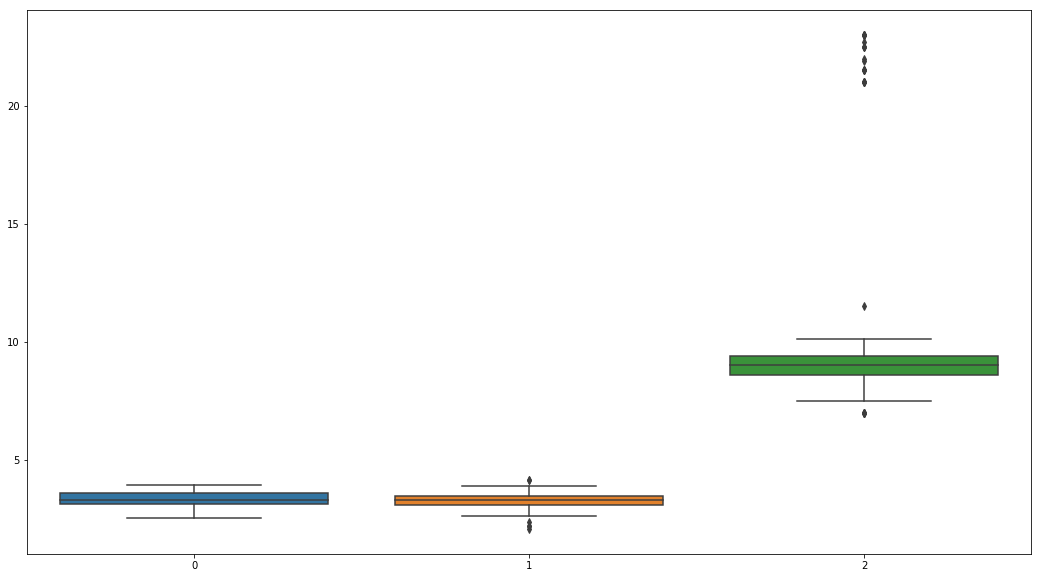

In [187]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.boxplot(ax=ax, data=[auto_df["bore"],auto_df["stroke"],auto_df["compression_ratio"]])

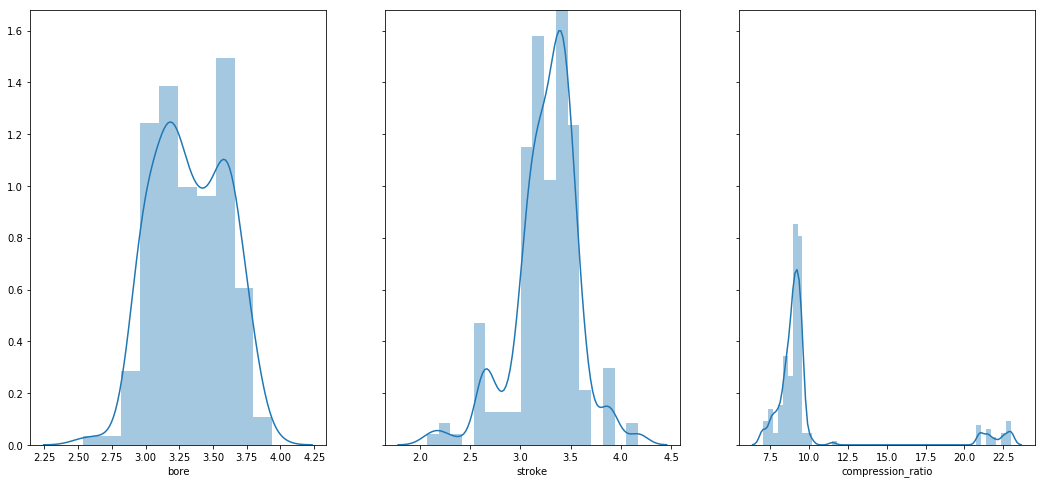

In [188]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_size_inches(18, 8)
sns.distplot(auto_df["bore"],ax=ax1)
sns.distplot(auto_df["stroke"],ax=ax2)
sns.distplot(auto_df["compression_ratio"],ax=ax3)

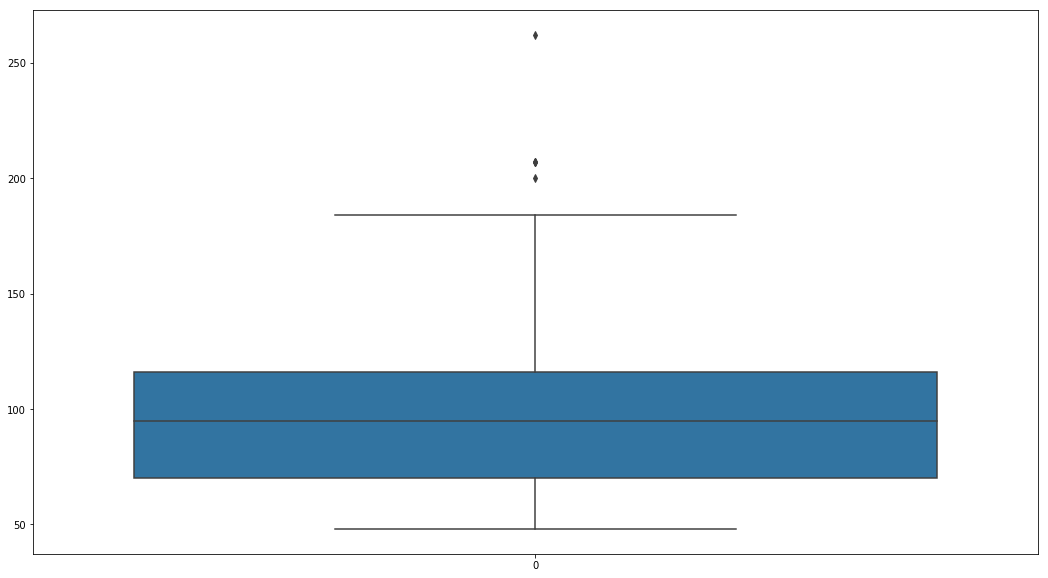

In [189]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.boxplot(ax=ax, data=[auto_df["horsepower"]])

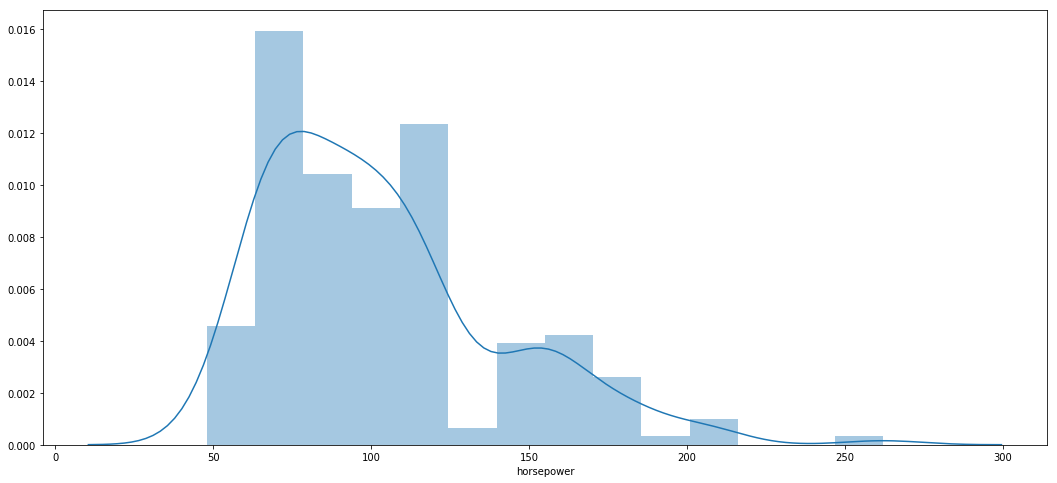

In [190]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(18, 8)
sns.distplot(auto_df["horsepower"], ax=ax1)

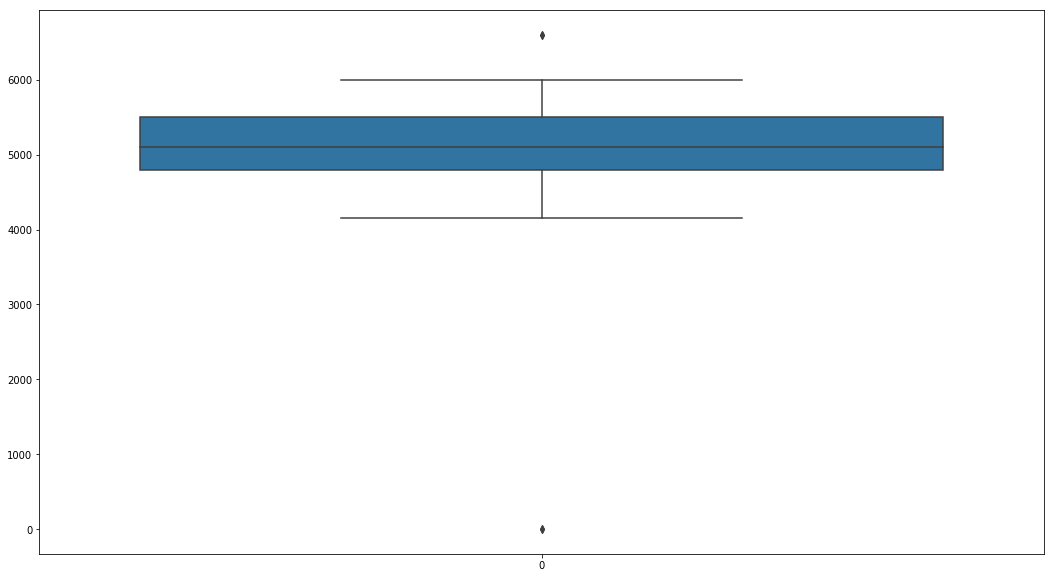

In [191]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.boxplot(ax=ax, data=[auto_df["peak_rpm"]])

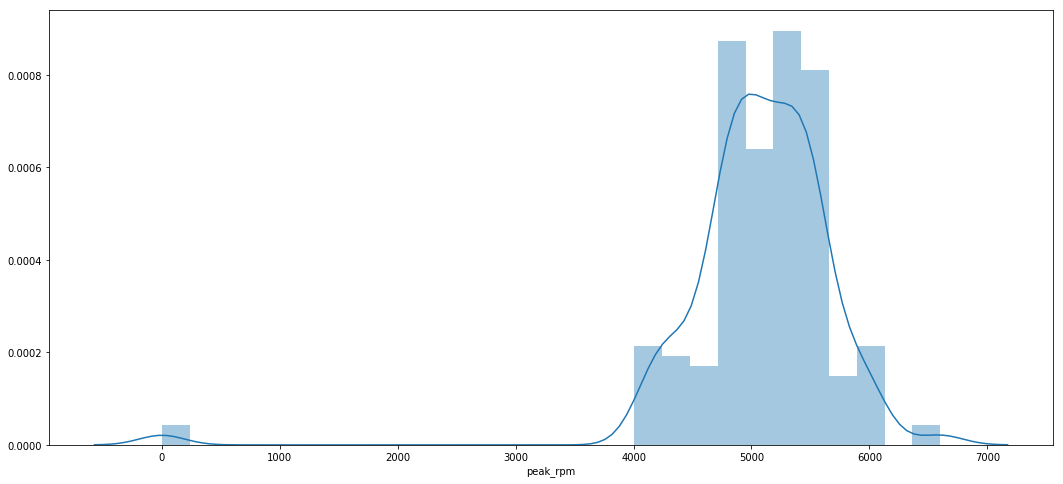

In [192]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(18, 8)
sns.distplot(auto_df["peak_rpm"].dropna(), ax=ax1)

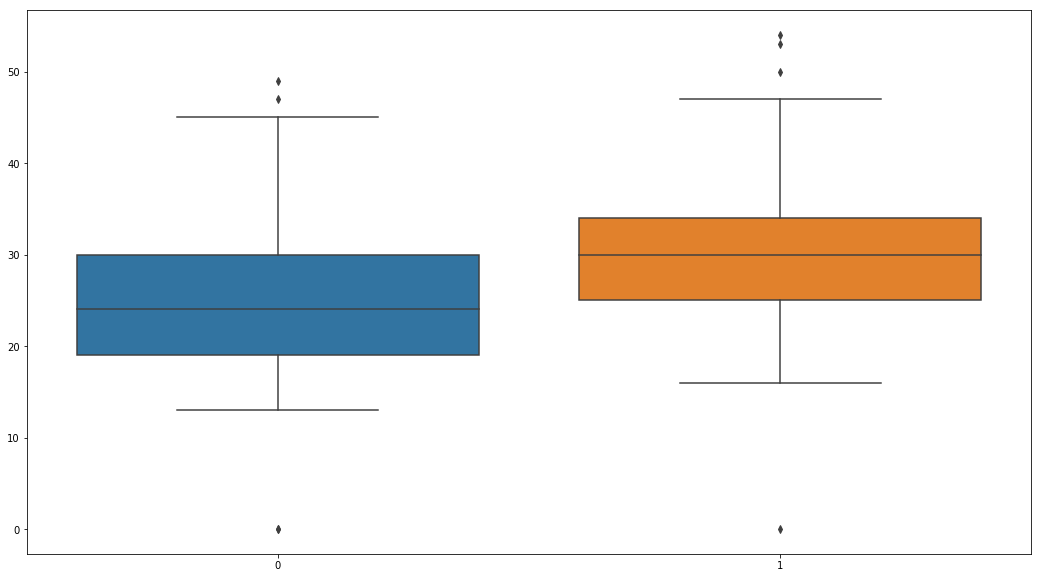

In [193]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.boxplot(ax=ax, data=[auto_df["city_mpg"],auto_df["highway_mpg"]])

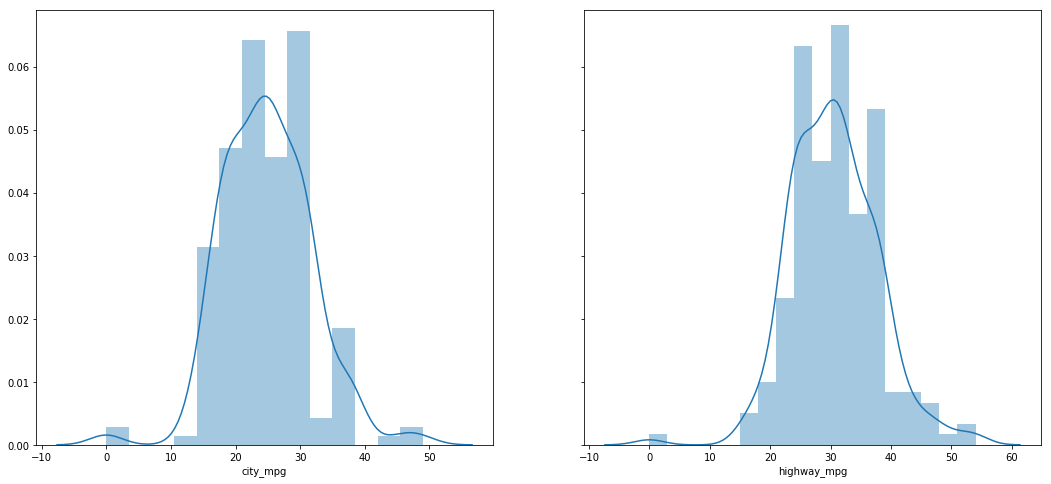

In [194]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(18, 8)
sns.distplot(auto_df["city_mpg"].dropna(),ax=ax1)
sns.distplot(auto_df["highway_mpg"].dropna(),ax=ax2)

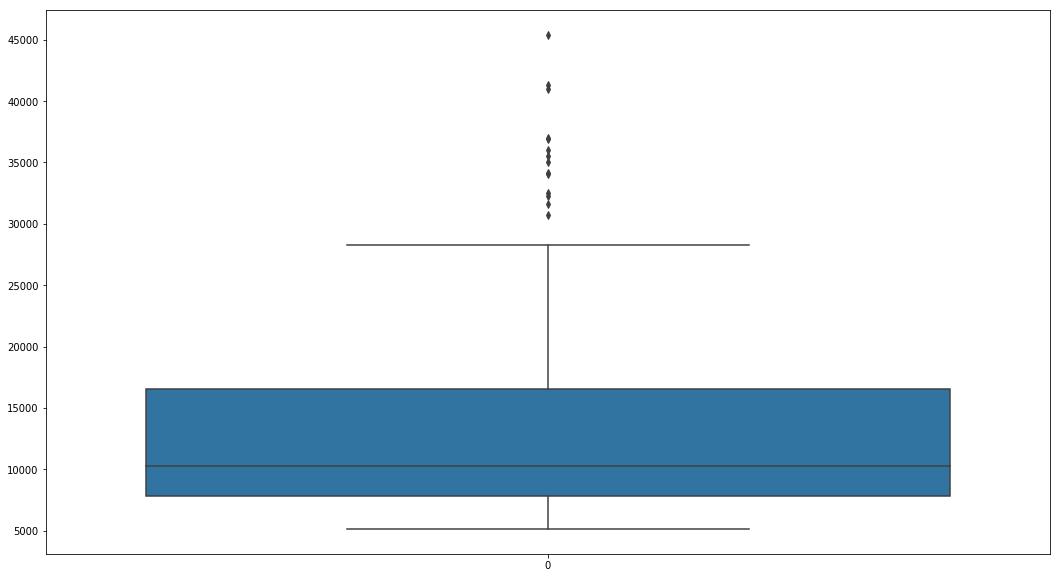

In [195]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.boxplot(ax=ax, data=[auto_df["price"]])

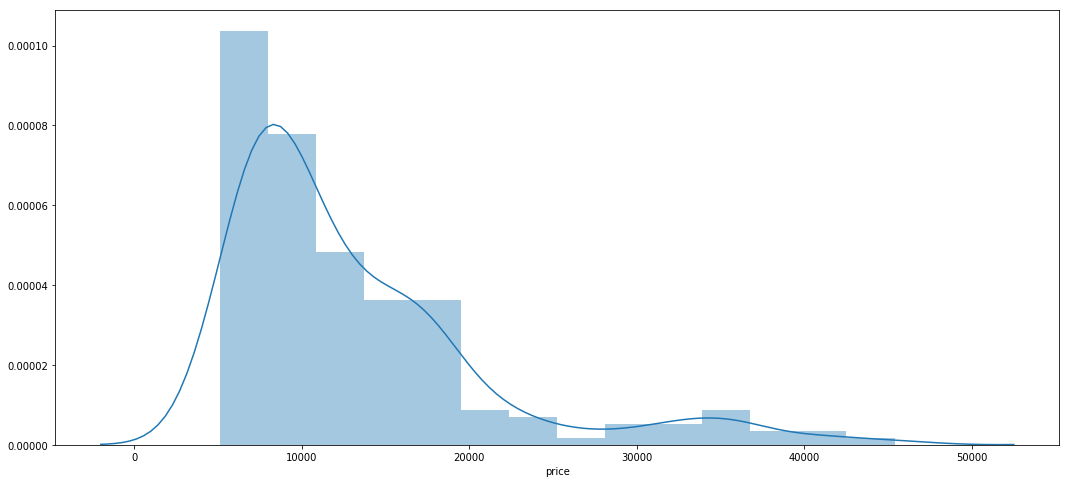

In [196]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
fig.set_size_inches(18, 8)
sns.distplot(auto_df["price"], ax=ax1)

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [197]:
#IMPLEMENTAÇÃO

auto_df.isnull().any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
dtype: bool

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

In [198]:
auto_df[auto_df["peak_rpm"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,...,108,2bbl,3.62,2.64,8.7,73,NaN,26.0,31.0,7603
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,10.0,100,NaN,26.0,32.0,9995


In [199]:
auto_df[(auto_df["make"]=="subaru") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
134,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,...,97,2bbl,3.62,2.36,9.0,69,4900.0,31.0,36.0,5118
135,subaru,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,...,108,2bbl,3.62,2.64,8.7,73,4400.0,26.0,31.0,7053
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,...,108,2bbl,3.62,2.64,8.7,73,NaN,26.0,31.0,7603


In [200]:
auto_df[(auto_df["make"]=="subaru") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]["peak_rpm"].mean()

4650.0

In [201]:
auto_df[(auto_df["make"]=="subaru") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]["peak_rpm"]

134    4900.0
135    4400.0
136       NaN
Name: peak_rpm, dtype: float64

In [202]:
auto_df.loc[(auto_df["make"]=="subaru") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback"), "peak_rpm"] = auto_df[(auto_df["make"]=="subaru") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]["peak_rpm"].replace(np.nan,auto_df[(auto_df["make"]=="subaru") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]["peak_rpm"].mean())

In [203]:
auto_df[(auto_df["make"]=="volkswagen") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="four") &
        (auto_df["body_style"]=="sedan")]["peak_rpm"].mean()

5333.333333333333

In [204]:
auto_df.loc[(auto_df["make"]=="volkswagen") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="four") &
        (auto_df["body_style"]=="sedan"), "peak_rpm"] = auto_df[(auto_df["make"]=="volkswagen") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="four") &
        (auto_df["body_style"]=="sedan")]["peak_rpm"].replace(np.nan,auto_df[(auto_df["make"]=="volkswagen") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="four") &
        (auto_df["body_style"]=="sedan")]["peak_rpm"].mean())

In [205]:
auto_df[auto_df["peak_rpm"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [206]:
auto_df[auto_df["city_mpg"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895


In [207]:
auto_df[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
29,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,92,1bbl,2.91,3.41,9.6,58,4800.0,49.0,54.0,6479
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,92,1bbl,2.91,3.41,9.2,76,6000.0,31.0,38.0,6855
31,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,79,1bbl,2.91,3.07,10.1,60,5500.0,38.0,42.0,5399
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7129
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895
37,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,27.0,33.0,9095


In [208]:
auto_df[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]["city_mpg"]

29    49.0
30    31.0
31    38.0
32    30.0
33    30.0
36     NaN
37    27.0
Name: city_mpg, dtype: float64

In [209]:
auto_df[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]["city_mpg"].mean()

34.166666666666664

In [210]:
auto_df.loc[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback"), "city_mpg"] = auto_df[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]["city_mpg"].replace(np.nan,auto_df[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]["city_mpg"].mean())

In [211]:
auto_df[auto_df["city_mpg"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [212]:
auto_df[auto_df["highway_mpg"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529


In [213]:
auto_df[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]["highway_mpg"]

29    54.0
30    38.0
31    42.0
32     NaN
33    34.0
36    33.0
37    33.0
Name: highway_mpg, dtype: float64

In [214]:
auto_df[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]["highway_mpg"].mean()

39.0

In [215]:
auto_df.loc[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback"), "highway_mpg"] = auto_df[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]["highway_mpg"].replace(np.nan,auto_df[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") & (auto_df["number_of_doors"]=="two") &
        (auto_df["body_style"]=="hatchback")]["highway_mpg"].mean())

In [216]:
auto_df[auto_df["highway_mpg"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


### Análise de valores com valores iguais a 0

Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

In [217]:
#IMPLEMENTAÇÃO

(auto_df == 0).any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
dtype: bool

In [218]:
auto_df[auto_df["city_mpg"] == 0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,0.0,25.0,28176
181,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,9.0,85,5250.0,0.0,34.0,8195


In [219]:
auto_df[(auto_df["make"]=="mercedes-benz") & (auto_df["fuel_type"]=="diesel")]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
64,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,25552
65,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,28248
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,0.0,25.0,28176
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,0.0,31600


Nesse caso não há variação. Será imputado 22 diretamente.

In [220]:
auto_df.loc[(auto_df["make"]=="mercedes-benz") & (auto_df["fuel_type"]=="diesel"), "city_mpg"] = auto_df[(auto_df["make"]=="mercedes-benz") & (auto_df["fuel_type"]=="diesel")]["city_mpg"].replace(0,22)

In [221]:
auto_df[auto_df["city_mpg"] == 0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
181,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.4,9.0,85,5250.0,0.0,34.0,8195


In [222]:
auto_df[(auto_df["make"]=="volkswagen") & (auto_df["fuel_type"]=="gas") & 
        (auto_df["number_of_doors"]=="four") & (auto_df["body_style"]=="sedan") & 
        (auto_df["length"]==171.7)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
181,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.4,9.0,85,5250.000000,0.0,34.0,8195
182,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.4,9.0,85,5250.000000,27.0,34.0,8495
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.4,10.0,100,5333.333333,26.0,32.0,9995


In [223]:
auto_df[(auto_df["make"]=="volkswagen") & (auto_df["fuel_type"]=="gas") & 
        (auto_df["number_of_doors"]=="four") & (auto_df["body_style"]=="sedan") & 
        (auto_df["length"]==171.7) & (auto_df["city_mpg"]>0)]["city_mpg"].mean()

26.5

In [224]:
auto_df.loc[(auto_df["make"]=="volkswagen") & (auto_df["fuel_type"]=="gas") & 
        (auto_df["number_of_doors"]=="four") & (auto_df["body_style"]=="sedan") & 
        (auto_df["length"]==171.7), "city_mpg"] = auto_df[(auto_df["make"]=="volkswagen") & (auto_df["fuel_type"]=="gas") & 
        (auto_df["number_of_doors"]=="four") & (auto_df["body_style"]=="sedan") & 
        (auto_df["length"]==171.7)]["city_mpg"].replace(0,auto_df[(auto_df["make"]=="volkswagen") & (auto_df["fuel_type"]=="gas") & 
        (auto_df["number_of_doors"]=="four") & (auto_df["body_style"]=="sedan") & 
        (auto_df["length"]==171.7) & (auto_df["city_mpg"]>0)]["city_mpg"].mean())

In [225]:
auto_df[auto_df["city_mpg"] == 0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [226]:
auto_df[auto_df["highway_mpg"] == 0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,0.0,31600


In [227]:
auto_df[(auto_df["make"]=="mercedes-benz") & (auto_df["fuel_type"]=="diesel") & (auto_df["body_style"]=="sedan")]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
64,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,25552
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,0.0,31600


Novamente, sem variação, será imputado 25 diretamente.

In [228]:
auto_df.loc[(auto_df["make"]=="mercedes-benz") & 
            (auto_df["fuel_type"]=="diesel") & 
            (auto_df["body_style"]=="sedan"), "highway_mpg"] = auto_df[(auto_df["make"]=="mercedes-benz") & 
                                                                       (auto_df["fuel_type"]=="diesel") & 
                                                                       (auto_df["body_style"]=="sedan")]["highway_mpg"].replace(0,22)


In [229]:
auto_df[auto_df["highway_mpg"] == 0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [230]:
auto_df[auto_df["peak_rpm"] == 0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,39.0,6529
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,0.0,30.0,34.0,7295


In [231]:
auto_df[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") & (auto_df["body_style"]=="hatchback") & (auto_df["width"]==64)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
31,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,79,1bbl,2.91,3.07,10.1,60,5500.0,38.0,42.0,5399
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,39.0,6529
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7129


Os valores de RPM geralmenrte são padronizados, portanto podemos optar por um dos exemplos dos modelos similares para imputar. Uma interpolação por média também poderia ser realizado.

In [232]:
auto_df.loc[(auto_df["make"]=="honda") & 
            (auto_df["fuel_type"]=="gas") & 
            (auto_df["body_style"]=="hatchback") & 
            (auto_df["width"]==64), "peak_rpm"] = auto_df[
    (auto_df["make"]=="honda") & 
    (auto_df["fuel_type"]=="gas") & 
    (auto_df["body_style"]=="hatchback") & 
    (auto_df["width"]==64)]["peak_rpm"].replace(0, 5500)

In [233]:
auto_df[auto_df["peak_rpm"] == 0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,0.0,30.0,34.0,7295


In [234]:
auto_df[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas") ]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
29,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,92,1bbl,2.91,3.41,9.6,58,4800.0,49.000000,54.0,6479
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,92,1bbl,2.91,3.41,9.2,76,6000.0,31.000000,38.0,6855
31,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,79,1bbl,2.91,3.07,10.1,60,5500.0,38.000000,42.0,5399
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,5500.0,30.000000,39.0,6529
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.000000,34.0,7129
34,honda,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.000000,34.0,7295
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,0.0,30.000000,34.0,7295
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,34.166667,33.0,7895
37,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,27.000000,33.0,9095
38,honda,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,27.000000,33.0,8845


Neste caso não há muitas amostras para obter algum exemplo, logo, a aproximação é por um modelo com as dimensões semelhantes.

In [235]:
auto_df.loc[(auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas"), "peak_rpm"] = auto_df[
    (auto_df["make"]=="honda") & (auto_df["fuel_type"]=="gas")]["peak_rpm"].replace(0, 6000)

In [236]:
(auto_df == 0).any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm               False
city_mpg               False
highway_mpg            False
price                  False
dtype: bool

### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [237]:
def identificacao_outlier(df, column_name): 
    print(column_name)
    
    serie = df[column_name]
    
    q1 = np.percentile(serie, 25)
    q3 = np.percentile(serie, 75)
    
    limite = 5 * (q3 - q1)
    
    outlier_upper = [x for x in serie if (x > q3 + limite)]
    outlier_lower = [x for x in serie if (x < q1 - limite)]
    
    print(outlier_upper + outlier_lower)

In [238]:
identificacao_outlier(auto_df, "wheel_base")
identificacao_outlier(auto_df, "length")
identificacao_outlier(auto_df, "width")
identificacao_outlier(auto_df, "height")
identificacao_outlier(auto_df, "curb_weight")
identificacao_outlier(auto_df, "engine_size")
identificacao_outlier(auto_df, "bore")
identificacao_outlier(auto_df, "stroke")
identificacao_outlier(auto_df, "compression_ratio")
identificacao_outlier(auto_df, "horsepower")
identificacao_outlier(auto_df, "peak_rpm")
identificacao_outlier(auto_df, "city_mpg")
identificacao_outlier(auto_df, "highway_mpg")
identificacao_outlier(auto_df, "price")

wheel_base
[]
length
[]
width
[]
height
[]
curb_weight
[]
engine_size
[]
bore
[]
stroke
[]
compression_ratio
[22.699999999999999, 22.0, 21.5, 21.5, 21.5, 21.5, 21.899999999999999, 21.0, 21.0, 21.0, 21.0, 21.0, 22.5, 22.5, 22.5, 23.0, 23.0, 23.0, 23.0, 23.0]
horsepower
[]
peak_rpm
[]
city_mpg
[]
highway_mpg
[]
price
[]


__Pergunta__: Houve dados discrepantes localizados pela metodologia sugerida? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

__Resposta__


### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [239]:
#IMPLEMENTAÇÃO

def mapear_serie(serie):
    i = 1
    dict_gen = {}
    for item in serie:
        dict_gen[item] = i
        i += 1
    return dict_gen

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

In [240]:
# IMPLEMENTAÇÃO 

dict_make = mapear_serie(auto_df["make"].unique())
dict_make

{'alfa-romero': 1,
 'audi': 2,
 'bmw': 3,
 'chevrolet': 4,
 'dodge': 5,
 'honda': 6,
 'isuzu': 7,
 'jaguar': 8,
 'mazda': 9,
 'mercedes-benz': 10,
 'mercury': 11,
 'mitsubishi': 12,
 'nissan': 13,
 'peugot': 14,
 'plymouth': 15,
 'porsche': 16,
 'renault': 17,
 'saab': 18,
 'subaru': 19,
 'toyota': 20,
 'volkswagen': 21,
 'volvo': 22}

In [242]:
dict_fuel_type = mapear_serie(auto_df["fuel_type"].unique())
dict_aspiration = mapear_serie(auto_df["aspiration"].unique())
dict_number_of_doors = mapear_serie(auto_df["number_of_doors"].unique())
dict_body_style = mapear_serie(auto_df["body_style"].unique())
dict_drive_wheels = mapear_serie(auto_df["drive_wheels"].unique())
dict_engine_location= mapear_serie(auto_df["engine_location"].unique())
dict_fuel_system = mapear_serie(auto_df["fuel_system"].unique())

In [243]:
auto_df["make"] = auto_df["make"].map(dict_make)
auto_df["fuel_type"] = auto_df["fuel_type"].map(dict_fuel_type)
auto_df["aspiration"] = auto_df["aspiration"].map(dict_aspiration)
auto_df["number_of_doors"] = auto_df["number_of_doors"].map(dict_number_of_doors)
auto_df["body_style"] = auto_df["body_style"].map(dict_body_style)
auto_df["drive_wheels"] = auto_df["drive_wheels"].map(dict_drive_wheels)
auto_df["engine_location"] = auto_df["engine_location"].map(dict_engine_location)
auto_df["fuel_system"] = auto_df["fuel_system"].map(dict_fuel_system)

auto_df.head(10)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1,1,1,1,1,1,1,88.6,168.8,64.1,...,130,1,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,1,1,1,1,1,1,1,88.6,168.8,64.1,...,130,1,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,1,1,1,1,2,1,1,94.5,171.2,65.5,...,152,1,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,2,1,1,2,3,2,1,99.8,176.6,66.2,...,109,1,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,2,1,1,2,3,3,1,99.4,176.6,66.4,...,136,1,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,2,1,1,1,3,2,1,99.8,177.3,66.3,...,136,1,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,2,1,1,2,3,2,1,105.8,192.7,71.4,...,136,1,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,2,1,1,2,4,2,1,105.8,192.7,71.4,...,136,1,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,2,1,2,2,3,2,1,105.8,192.7,71.4,...,131,1,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,3,1,1,1,3,1,1,101.2,176.8,64.8,...,108,1,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

In [ ]:
#IMPLEMENTAÇÃO

#Aqui é uma inspeção visual mesmo. Algum comando do tipo dataframe.head(30) deve ser suficiente. 
#Fique livre para testar quaisquer ténicas que deseje.

## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Logística](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

__Pergunta__: Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

__Resposta__